In [1]:
import pandas as pd
import pickle
import joblib
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,train_test_split
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [2]:
dataframe=pd.read_csv("./Heart_Disease_Prediction.csv")
dataframe.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [3]:
x = dataframe.iloc[ : , :-1].values
y = dataframe.iloc[ : , -1].values
print(x)
print(y)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]]
['Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Abs

In [4]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(dataframe['Heart Disease'])
dataframe['Heart Disease'] = le.fit_transform(dataframe['Heart Disease'])
dataframe['Heart Disease'].dtypes



dtype('int64')

In [5]:
dataframe.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=40)

              precision    recall  f1-score   support

     Absence       0.89      1.00      0.94        40
    Presence       1.00      0.82      0.90        28

    accuracy                           0.93        68
   macro avg       0.94      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68

Testing Accuracy for Decision Tree: 0.9264705882352942
Testing Sensitivity for Decision Tree: 0.8888888888888888
Testing Specificity for Decision Tree: 1.0
Testing Precision for Decision Tree: 1.0


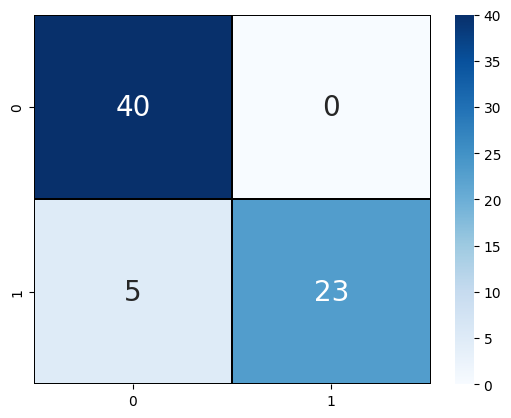

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap="Blues",linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={
    'criterion':('gini','entropy'),
    'max_depth':(3,5,7,9,10),
    'max_features':('auto','sqrt','log2'),
    'min_samples_split': (2,4,6)
}
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv=10, verbose=True)
dt_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [9]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [10]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 243, Test set:27
Fold:2, Train set: 243, Test set:27
Fold:3, Train set: 243, Test set:27
Fold:4, Train set: 243, Test set:27
Fold:5, Train set: 243, Test set:27
Fold:6, Train set: 243, Test set:27
Fold:7, Train set: 243, Test set:27
Fold:8, Train set: 243, Test set:27
Fold:9, Train set: 243, Test set:27
Fold:10, Train set: 243, Test set:27


In [11]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [14]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.81481481 0.7037037  0.77777778 0.77777778 0.74074074 0.7037037
 0.85185185 0.81481481 0.74074074 0.62962963]
Average score: 0.76


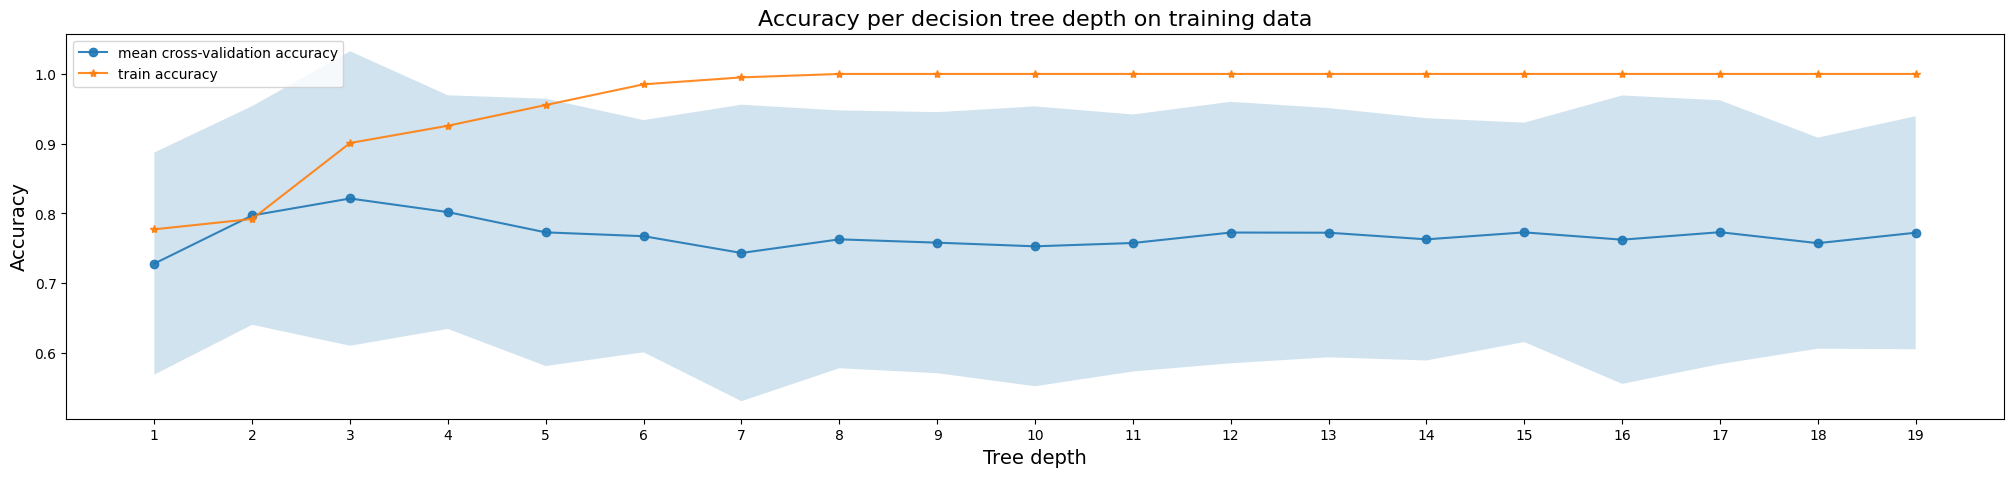

In [15]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(25,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
sm_tree_depths = range(1,20)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 'Accuracy per decision tree depth on training data')

              precision    recall  f1-score   support

     Absence       0.87      1.00      0.93        40
    Presence       1.00      0.79      0.88        28

    accuracy                           0.91        68
   macro avg       0.93      0.89      0.91        68
weighted avg       0.92      0.91      0.91        68



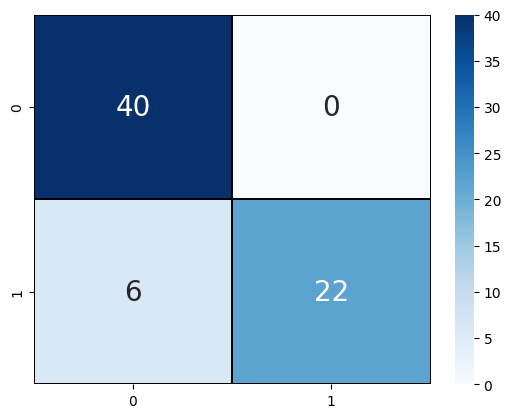

In [16]:
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='Blues',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

In [17]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

Testing Accuracy for Decision Tree: 0.9117647058823529
Testing Sensitivity for Decision Tree: 0.8695652173913043
Testing Specificity for Decision Tree: 1.0
Testing Precision for Decision Tree: 1.0


In [18]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5)))

The depth-3 tree achieves the best mean cross-validation accuracy 82.14286 on training dataset


In [19]:
predictiontree=tree_model.predict(X_test)

              precision    recall  f1-score   support

     Absence       0.78      0.78      0.78        40
    Presence       0.68      0.68      0.68        28

    accuracy                           0.74        68
   macro avg       0.73      0.73      0.73        68
weighted avg       0.74      0.74      0.74        68



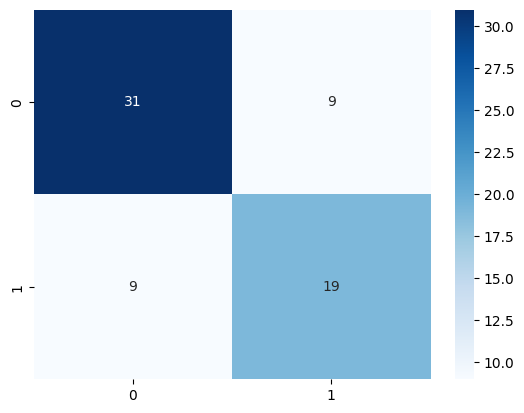

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtclas=DecisionTreeClassifier()
modeldt=dtclas.fit(X_train,y_train)
predictiondt=modeldt.predict(X_test)
cmdt= confusion_matrix(y_test,predictiondt)
sns.heatmap(cmdt, annot=True,cmap='Blues')
print(classification_report(y_test, predictiondt))

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/swetha/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [51]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)

In [23]:
from sklearn.metrics import accuracy_score
input=(63,1,3,145,200,150,98,0,0,0,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if pre1==0:
    print("Absence")
else:
    print("Presence")
a1 = accuracy_score(pre1,model1.predict(input_reshaped)) * 100
print(a1)

Presence
100.0


In [24]:
from sklearn.metrics import accuracy_score
input=(70,1,4,130,322,0,2,109,0,2.4,2,3,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if pre1==0:
    print("Absence")
else:
    print("Presence")
a1 = accuracy_score(pre1,model1.predict(input_reshaped)) * 100
print(a1)

Presence
100.0


In [25]:
dtclas=DecisionTreeClassifier()
decision_tree_classifier = dtclas.fit(X_train,y_train)
decision_tree_prediction = dtclas.predict(X_test)
decision_tree_prediction

array(['Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence'], dtype=object)

In [26]:
joblib.dump(dtclas, 'heart_disease_detector.pkl')

['heart_disease_detector.pkl']